In [3]:
import data_loader

# Use senator data
arr, reps, bills = data_loader.senate_records()

print(arr)

[[-1. -1.  0. ... -1. -1.  0.]
 [ 1.  1.  1. ... -1.  1.  1.]
 [ 1.  1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  1.  1.  1.]
 [-1. -1.  1. ... -1. -1.  1.]
 [ 0.  0.  1. ...  0.  0.  1.]]


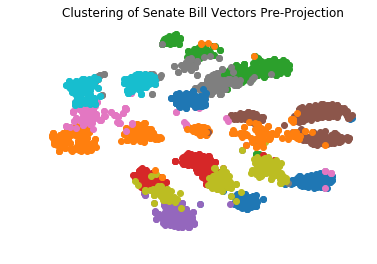

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of Senate Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

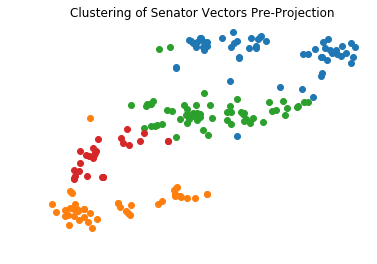

In [6]:
# And for the senators

em = TSNE(n_components=2).fit_transform(arr)
num_clust = 4
centers = KMeans(n_clusters=num_clust).fit_predict(arr)
plt.axis('off')
plt.title('Clustering of Senator Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

Ayotte (R-NH)
Brown (R-MA)
Snowe (R-ME)


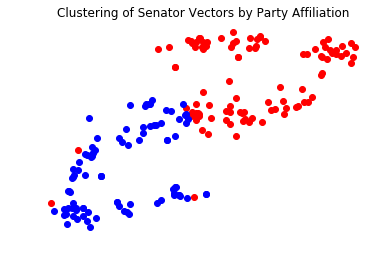

In [28]:
import numpy as np

# Senators by party with same projection
fig = plt.figure()
num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
cluster_locs = KMeans(n_clusters=2).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Senator Vectors by Party Affiliation')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')

for i, x in enumerate(reps):
    if '(R' in x and sum(np.linalg.norm(em[i] - j) for j in em[centers == 1]) < sum(np.linalg.norm(em[i] - j) for j in em[centers == 0]):
        print(x)
plt.show()

In [5]:
# Now use house data
arr, reps, bills = data_loader.house_records()

print(arr)

Unable to read 2017_711.xml
Unable to read 2013_2.xml
Unable to read 2011_2.xml
Unable to read 2015_2.xml
Unable to read 2017_2.xml
Unable to read 2019_2.xml
Unable to read 2015_581.xml


[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


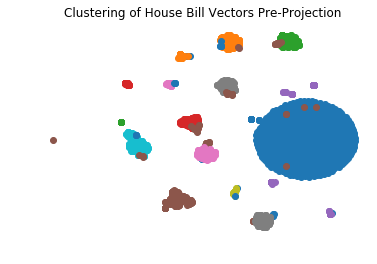

In [6]:
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 18
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of House Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show();

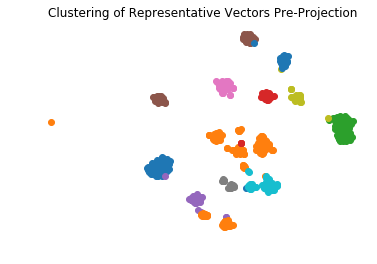

In [7]:
# House representative vector clustering
em = TSNE(n_components=2).fit_transform(arr)
num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr)
plt.axis('off')
plt.title('Clustering of Representative Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

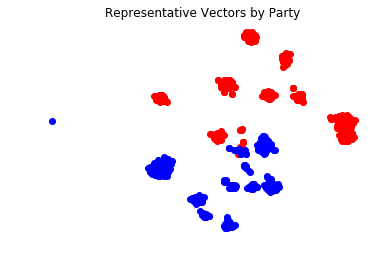

In [8]:
# House representative vectors by party
num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Representative Vectors by Party')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()

In [24]:
arr, reps, bills = data_loader.senate_records()
clusters = KMeans(n_clusters=12).fit_predict(arr.T)

In [34]:
mask = np.array(['(D' in x for x in reps])
print(mask.shape)
for i in range(12):
    print(f'{"-" * 20} Cluster {i} {"-" * 20}')
    for bill, vec in zip(bills[clusters == i][:20], arr[:, clusters == i].T):
        dem = np.dot(vec, mask)
        rep = np.dot(vec, ~mask)
        if rep > dem:
            print('(Rep Supported ' +str(rep-dem)+' )', end=' ')
        else:
            print('(Dem Supported ' + str(dem-rep) + ' )', end=' ')
        print(f"{bill['vote_title'][:50]}")


    print()

(190,)
-------------------- Cluster 0 --------------------
(Dem Supported 69.0 ) Motion to Invoke Cloture on H.R. 1256
(Dem Supported 69.0 ) Motion to Invoke Cloture Andrew David Hurwitz, of 
(Dem Supported 33.0 ) Snowe Amdt. No. 2190 As Modified
(Dem Supported 47.0 ) Casey Amdt. No. 2238
(Dem Supported 40.0 ) Cloture on the Nomination of Norman L. Eisen, of t
(Dem Supported 48.0 ) Motion to Invoke Cloture on the Nomination of Chri
(Dem Supported 37.0 ) Motion to Table Coburn Amdt. No. 325
(Dem Supported 59.0 ) H.R. 2832 as Amended
(Dem Supported 34.0 ) Motion to Invoke Cloture on the Inouye Amdt. No. 7
(Dem Supported 62.0 ) Motion to Table Coburn Amdt. No. 294
(Dem Supported 67.0 ) Resolution of Advice and Consent to Ratification A
(Dem Supported 30.0 ) Upon Reconsideration Motion to Invoke Cloture on t
(Dem Supported 58.0 ) Confirmation of Christopher R. Hill, of Rhode Isla
(Dem Supported 44.0 ) Motion to Concur in the House Amdt. To the Senate 
(Dem Supported 57.0 ) H.R. 3672
(Dem S